In [70]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from fractions import Fraction
%matplotlib inline

In [71]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 11

# Potential Flow

# Freestream

complex velocity: $w(z) = A$, Complex Potential $W(z) = Az$

- velocity components: $w(z) = u - iv$
- potential: $\phi = ux + vy$
- stream function: $\Psi = uy - vx$

In [72]:
N = 500                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = np.meshgrid(x, y)              # generates a mesh grid

Example of freestream velocity with components $(2,-0.5)$

In [73]:
u = 2
v = -0.5

u_fs = u*np.ones((N, N), dtype=float)
v_fs = v*np.ones((N, N), dtype=float)

Definition of *Potential* $\Phi$ and *Stream Function* $\Psi$

In [74]:
ϕ = u*X + v*Y
Ψ = u*Y - v*X

Plot freestream with potential and strem contour lines

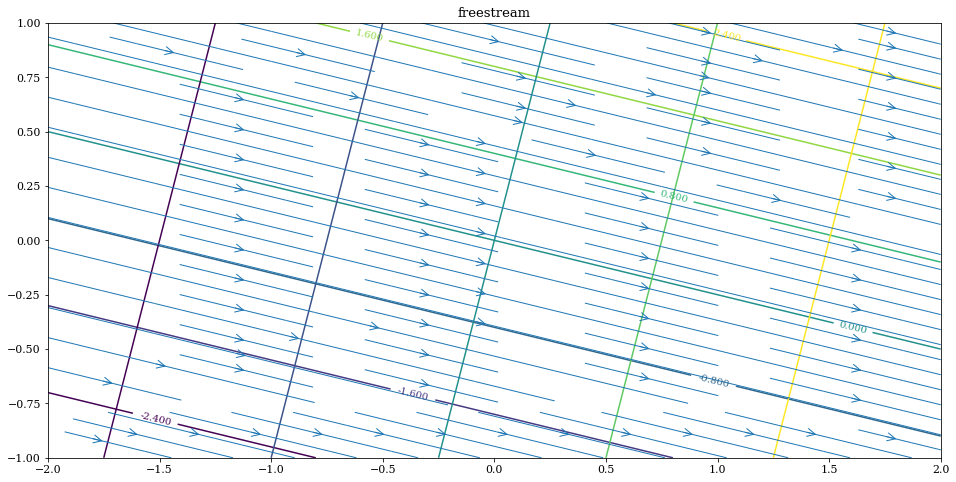

In [75]:
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
CS = plt.contour(X, Y, Ψ)
CS1 = plt.contour(X, Y, ϕ)
plt.streamplot(X, Y, u_fs, v_fs, density=1, linewidth=1, arrowsize=2, arrowstyle='->')
plt.clabel(CS, inline=5, fontsize=10)
plt.title('freestream');

# Flow around dihedrals

Potential flow around a dihedral is described by a complex velocity of the kind:

$$w(z) = Az^k$$

And complex Potential

$$W(z) = \frac{A}{k+1}z^{k+1}$$

## Flow angle:

$$\theta = \frac{\pi}{k+1}$$

We can distinguish:

- *acute angles*: $k > 1$
- *obtuse angles*: $0 < k < 1$
- *concave angles*: $-0.5 < k < 1$

Special cases:

- k = 1: **potential flow at 4 right angles**, or *stagnation point flow*
- k = 0: **freestream**
- k = -0.5: potential flow around a flat plate with null thickness


## Definitions

functions that return complex potential and velocity

In [76]:
def complex_potential(X,Y,A,k):
    if k != -1:
        return A/(k+1)*(X+Y*1j)**(k+1)
    else:
        return A*np.log(X+Y*1j)

In [77]:
def complex_velocity(X,Y,A,k):
    return A*(X+Y*1j)**k

# Corner Flow

## $k=1$

In [78]:
ksq = 1.
Asq = -1
w0 = complex_velocity(X,Y,Asq,ksq)
W0 = complex_potential(X,Y,Asq,ksq)

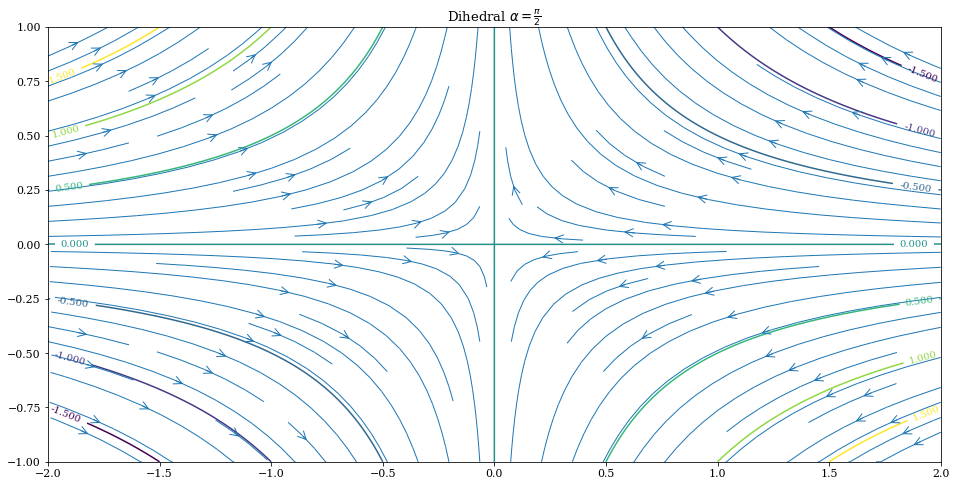

In [79]:
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
CS = plt.contour(X, Y, W0.imag)
#CS1 = plt.contour(X, Y, W1.real)
plt.streamplot(X, Y, w0.real, -w0.imag, density=1, linewidth=1, arrowsize=2, arrowstyle='->')
plt.clabel(CS, inline=5, fontsize=10)
plt.title(r'Dihedral $\alpha=\frac{\pi}{2}$');

# Acute Dihedral

In [80]:
k = 2.
A = 2
w1 = complex_velocity(X,Y,A,k)
W1 = complex_potential(X,Y,A,k)

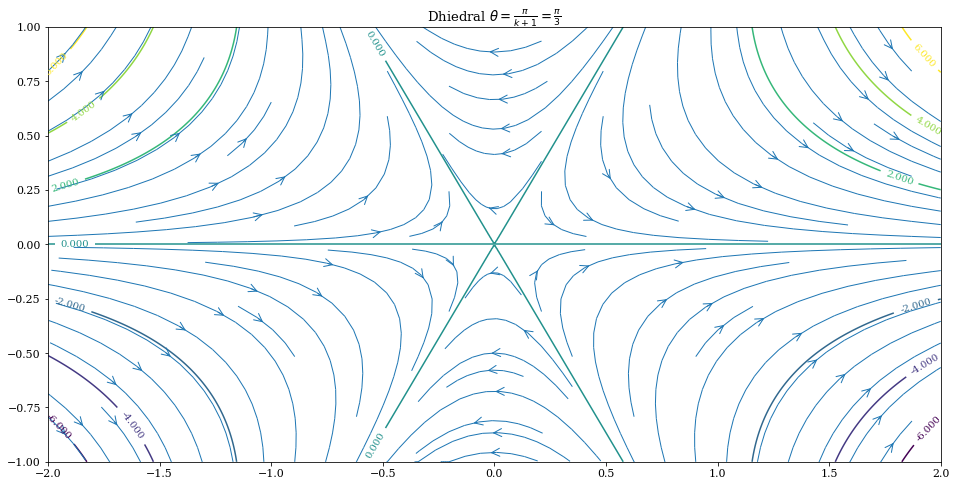

In [81]:
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
CS = plt.contour(X, Y, W1.imag)
#CS1 = plt.contour(X, Y, W1.real)
plt.streamplot(X, Y, w1.real, -w1.imag, density=1, linewidth=1, arrowsize=2, arrowstyle='->')
plt.clabel(CS, inline=5, fontsize=10)
plt.title(r'Dhiedral $\theta = \frac{\pi}{k+1}=\frac{\pi}{3}$');

# Polar coordinates

Definitions of $\Phi$, $\Psi$, $u$ and $v$ in polar coordinates

In [82]:
def polar_cp(ρ, θ, A, k):
    if k != -1:
        return [A/(k+1)*(ρ**(k+1))*np.cos((k+1)*θ), A/(k+1)*(ρ**(k+1))*np.sin((k+1)*θ)]
    else:
        return [A*np.log(ρ), A*θ]

In [94]:
def polar_cv(ρ, θ, A, k):
    u = A*(ρ**k)*np.cos(k*θ)
    v = -A*(ρ**k)*np.sin(k*θ)
    ur = u*np.cos(θ) + v*np.sin(θ)
    uth = (v*np.cos(θ) - u*np.sin(θ))/ρ
    return [ur,uth]

We define a function to plot *contour lines* for $\Psi$ and a *filled contour plot* for $\Phi$.

- $\Phi = \Re\left(\frac{A}{k+1}z^{k+1}\right)$
- $\Psi = \Im\left(\frac{A}{k+1}z^{k+1}\right)$


Parameters:
- k: such that the stream angle is $\frac{\pi}{k+1}$
- A: if $A \in \mathbb{R}$ stream angle is between 0 and $\frac{\pi}{k+1}$. Complex **A** rotates the flow 

In [84]:
def plot_dihedral(A,k):
    
    res = Fraction(1/(k+1)).limit_denominator(10)
    if k > 0:
        r1 = np.linspace(0.0, 4, 100)
    else:
        r1 = np.linspace(1e-3, 4, 100)
    t1 = np.linspace(0, np.pi/(k+1) , 100)
    
    #t1 = np.linspace(np.pi - np.pi/(k+1), np.pi , 100)
    ρ1, θ1 = np.meshgrid(r1, t1)
    
    u1,v1 = polar_cv(ρ1,θ1,A,k)
    Φ1,Ψ1 = polar_cp(ρ1,θ1,A,k)
    
    if k > 0:
        plt.figure(figsize=(16,8))
        points = np.array([[0.0,0.0],[4*np.cos(np.pi/(k+1)),4*np.sin(np.pi/(k+1))],[-4,4],[-4,0]])
        t1 = plt.Polygon(points, color= [0.5,0.5,0.5],alpha=0.5)
        plt.gca().add_patch(t1)
    else:
        plt.figure(figsize=(16,12))
        points = np.array([[0.0,0.0],[4,0],[4,-4],[4*np.cos(np.pi/(k+1)),4*np.sin(np.pi/(k+1))]])
        t1 = plt.Polygon(points, color= [0.5,0.5,0.5],alpha=0.5)
        plt.gca().add_patch(t1)
        
    levels = np.arange(-8, 8, 0.1)
    CS = plt.contourf(ρ1*np.cos(θ1), ρ1*np.sin(θ1), Φ1, levels)
    CS1 = plt.contour(ρ1*np.cos(θ1), ρ1*np.sin(θ1), Ψ1,levels)

    #plt.streamplot(ρ1*np.cos(θ1), ρ1*np.sin(θ1), u1, v1, density=1, linewidth=1, arrowsize=2, arrowstyle='->')
    plt.xlim(-2,2)
    if k > 0:
        plt.ylim(0,2)
    else:
        plt.ylim(-1,2)
    plt.clabel(CS, inline=1, fontsize=5)
    if res.numerator == 1:
        plt.title(r'Dihedral $\alpha=\frac{\pi}{'+str(res.denominator)+'}$');
    else:
        plt.title(r'Dihedral $\alpha=\frac{'+str(res.numerator)+'\pi}{'+str(res.denominator)+'}$');

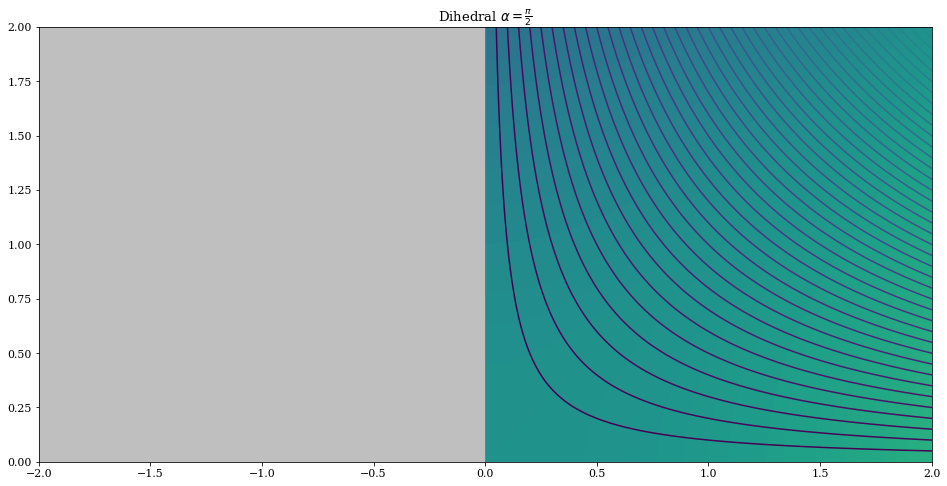

In [85]:
plot_dihedral(1,1)

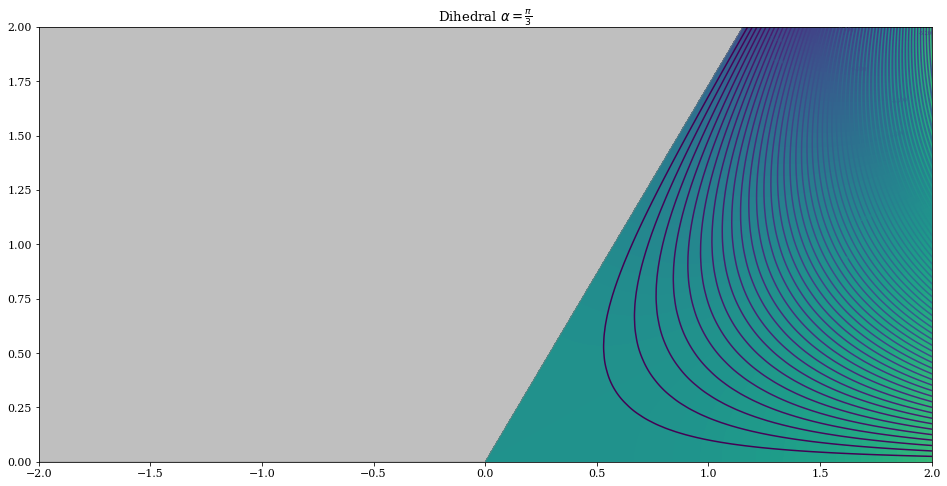

In [86]:
plot_dihedral(1,2)

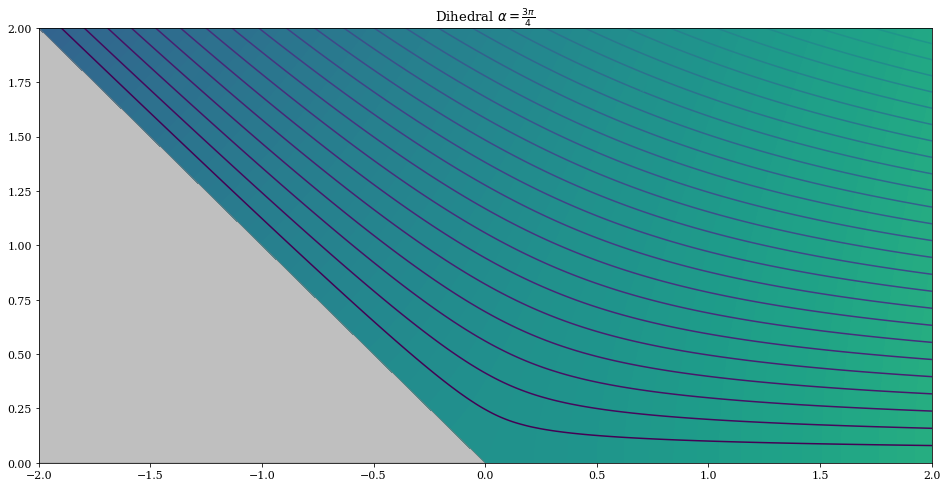

In [87]:
plot_dihedral(1,1/3)

The limit for *Falkner-Skan* self similar solutions with adverse pressure gradient is $\approx -17^o$ from horizontal, which is represented here. The limit corresponds to a solution where separation occurs everywhere on the surface.

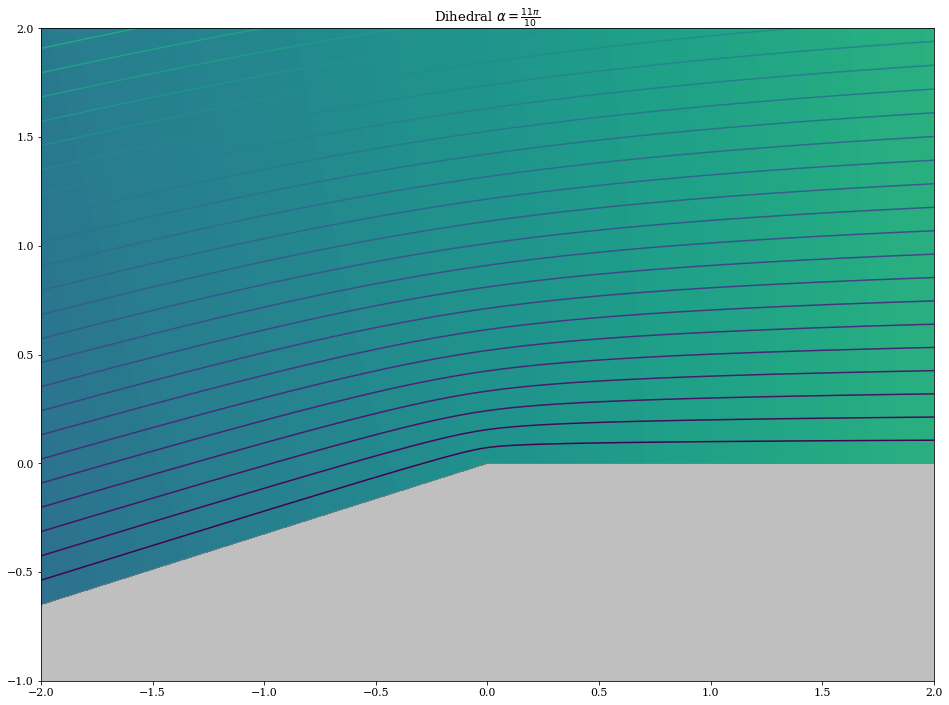

In [88]:
plot_dihedral(1,-1/11)

In [97]:
def plot_dihedral_polar(A,k):
    
    res = Fraction(1/(k+1)).limit_denominator(10)
    if k > 0:
        r1 = np.linspace(0.0, 4, 11)
    else:
        r1 = np.linspace(1e-3, 4, 11)
    t1 = np.linspace(0, np.pi/(k+1) , 11)
    
    #t1 = np.linspace(np.pi - np.pi/(k+1), np.pi , 100)
    θ1, ρ1 = np.meshgrid(t1, r1)
    
    u1,v1 = polar_cv(ρ1,θ1,A,k)
    Φ1,Ψ1 = polar_cp(ρ1,θ1,A,k)
    
    #u1 = np.ones_like(ρ1)
    #v1 = np.zeros_like(ρ1)
    
    plt.figure(figsize=(16,16))
    ax1 = plt.subplot(111,polar=True)
    #plt.gcf().add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

    ax1.streamplot(θ1, ρ1, v1, u1, density=1, linewidth=1, arrowsize=2, arrowstyle='->')
    #plt.xlim(-2,2)
    #print(θ1)
    if res.numerator == 1:
        plt.title(r'Dihedral $\alpha=\frac{\pi}{'+str(res.denominator)+'}$');
    else:
        plt.title(r'Dihedral $\alpha=\frac{'+str(res.numerator)+'\pi}{'+str(res.denominator)+'}$');

/home/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


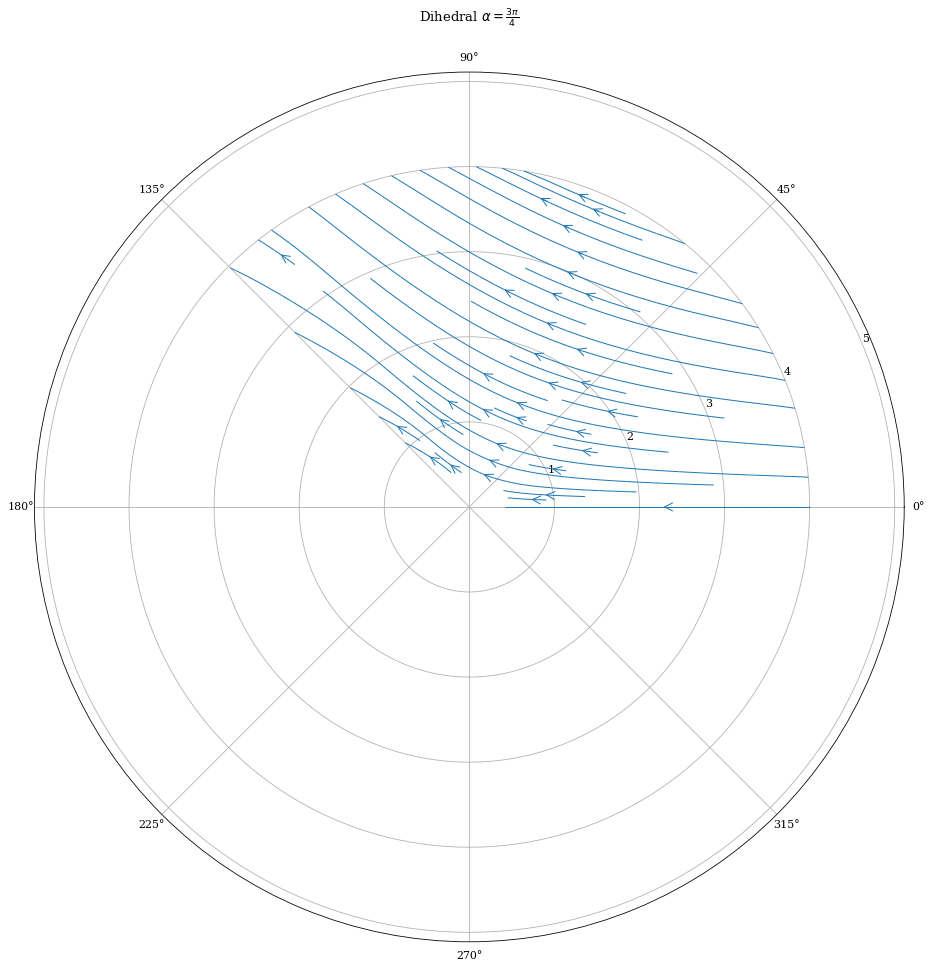

In [101]:
plot_dihedral_polar(-1,1/3)

In [91]:
\